Dataset from : https://www.kaggle.com/datasets/shub99/sentiment-analysis-data

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv',sep = '\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [133]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [134]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

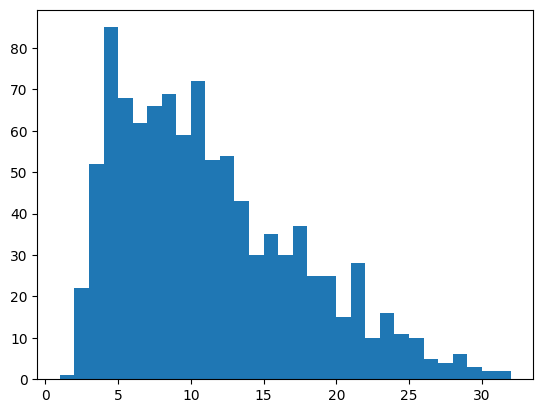

In [135]:
lengths = [len(t.split(' ')) for t in df['Review']]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

<Axes: xlabel='Liked', ylabel='count'>

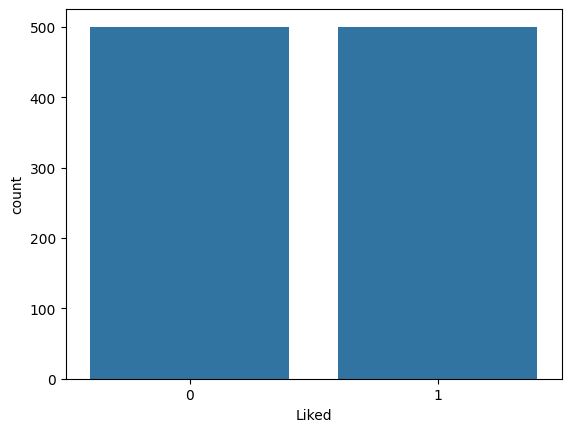

In [136]:
sns.countplot(x='Liked', data=df)

In [137]:
!pip install langdetect

In [138]:
from langdetect import detect

for i in range(len(df)):
  df['Language'] = detect(df['Review'][i])


In [139]:
df['Language'].value_counts()

Language
en    1000
Name: count, dtype: int64

In [140]:
!pip install nltk

In [141]:
df['Review'].head()

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Review, dtype: object

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True, token_pattern=r'\b\w+\b', dtype='uint8', min_df=6)


In [143]:
vectorized = vectorizer.fit_transform(df['Review'])
vectorized

<1000x293 sparse matrix of type '<class 'numpy.uint8'>'
	with 7662 stored elements in Compressed Sparse Row format>

In [144]:
X = pd.DataFrame(vectorized.toarray())
y = df['Liked']
X.shape, y.shape

((1000, 293), (1000,))

In [145]:
pd.set_option('display.max_columns', 2500)
X.sum()

0        7
1        9
2        8
3      237
4       17
      ... 
288     15
289     10
290     29
291     66
292     25
Length: 293, dtype: int64

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        96
           1       0.81      0.70      0.75       104

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200



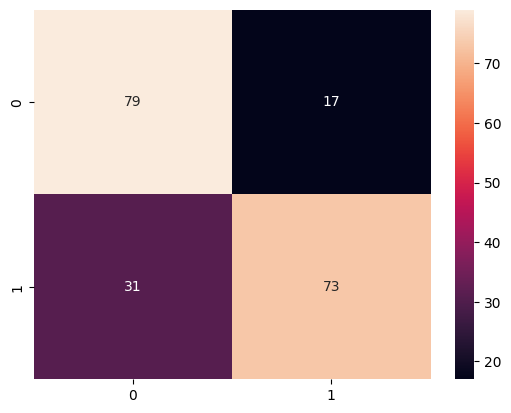

In [148]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [149]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        96
           1       0.79      0.75      0.77       104

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200



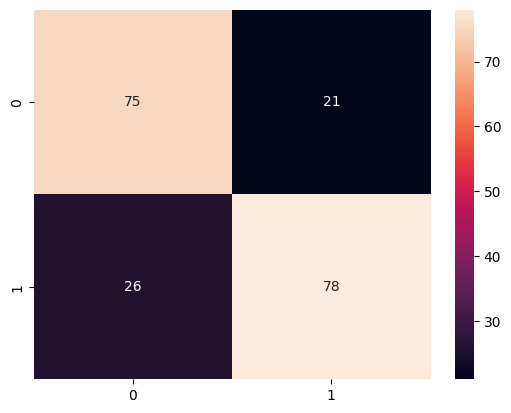

In [150]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

In [159]:
my_sentence = "not good"
my_sentence_vectorized = vectorizer.transform([my_sentence])
my_prediction = NB_classifier.predict(my_sentence_vectorized)
my_prediction

array([0])